# Step 1: Cloning and Building Darknet


In [1]:
# clone darknet 
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15150, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 15150 (delta 39), reused 51 (delta 21), pack-reused 15073
Receiving objects: 100% (15150/15150), 13.47 MiB | 21.12 MiB/s, done.
Resolving deltas: 100% (10284/10284), done.


In [2]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/darknet


In [3]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [4]:
# make darknet 
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:935:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1136:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
  

# Step 2: Move test images into Cloud VM


In [5]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Mounted at /content/gdrive


In [6]:
!ln -s /content/gdrive/Shareddrives/FishOASIS_ML-Detector/ /mydrive

In this step you need to specify the name of the zip folder with test images, e.g. two_test.zip

In [7]:
# cd back into the darknet folder
%cd /content/darknet
!mkdir data/test

/content/darknet


In [247]:
!rm -r data/test/one_valid_a
!rm data/test.txt

In [8]:
!ls /mydrive/CLARE/Data/

data	   one_train_a	one_train_d  one_valid_c  train_a
five_test  one_train_b	one_valid_a  one_valid_d  train_b
four_test  one_train_c	one_valid_b  three_test   two_test


In [53]:
train_a = glob.glob('/mydrive/CLARE/Data/one_train_a/*.JPG')

In [54]:
len(train_a)

4171

In [9]:
# copy the test files into data/test
!cp -r /mydrive/CLARE/Data/one_valid_d data/test

# Step 3: Configuring Files for Training
This step involves properly configuring your custom .cfg file, obj.data, obj.names and test.txt file.


In [10]:
# upload the yolov4-tiny .cfg back to cloud VM from Google Drive
!cp /mydrive/CLARE/YOLO_main/yolov4-tiny.cfg ./cfg

Uploading obj.names & obj.data into darknet data folder

In [11]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /mydrive/CLARE/YOLO_main/obj.names ./data
!cp /mydrive/CLARE/YOLO_main/obj.data  ./data

Uploading scripts to create a txt file of the test.zip

In [12]:
# upload the generate_namelist.py script to cloud VM from Google Drive
!cp /mydrive/CLARE/YOLO_main/generate_namelist.py ./

Now run the python script 

In [13]:
!python generate_namelist.py test

In [14]:
!cp data/test.txt data/train.txt

In [15]:
!ls data

9k.tree     eagle.jpg	 imagenet.labels.list	   obj.names	     test
coco9k.map  giraffe.jpg  imagenet.shortnames.list  openimages.names  test.txt
coco.names  goal.txt	 labels			   person.jpg	     train.txt
dog.jpg     horses.jpg	 obj.data		   scream.jpg	     voc.names


# Step 4: Generate prediction annotations using trained weights

In the code below, specify:

1.   weights file, e.g. backup_a/yolov4-tiny_final.weights
2.   name of output text file, e.g. results_two_test.txt



In [16]:
# run detector on test images and save annotations
!./darknet detector test data/obj.data cfg/yolov4-tiny.cfg /mydrive/CLARE/YOLO_main/backup_d/yolov4-tiny_final.weights -dont_show < data/test.txt > /mydrive/CLARE/YOLO_main/backup_d/results_one_valid.txt

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 2    608 x 608 x   3 ->  304 x 304 x  32 0.160 BF
   1 conv     64       3 x 3/ 2    304 x 304 x  32 ->  152 x 152 x  64 0.852 BF
   2 conv     64       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x  64 1.703 BF
   3 route  2 		                       1/2 ->  152 x 152 x  32 
   4 conv     32       3 x 3/ 1    152 x 152 x  32 ->  152 x 152 x  32 0.426 BF
   5 conv     32       3 x 3/ 1    152 x 152 x  32 ->  152 x 152 x  32 0.426 BF
   6 route  5 4 	                           ->  152 x 152 x  64 
   7 conv     64       1 x 1/ 1    152 x 152 x  64 ->  152 x 152 x  64 0.189 BF
   8 route  2 7 	                           ->  152 x 152 x 128 
   9 max                2x 2/ 2    152 x 152 x 128 ->   76 x  76 x 128 0.003 BF
  10 con

# Step 5: Compare predictions with ground truth

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
from PIL import Image

Load annotations output file (generated in previous step) and ground truth csv. In the code below, specify:
1. path to ground truth csv, e.g.'/link/INTERNS/CLARE/Pre-processing/Yolo_labels/180710_1/180710_1.csv'
2. path to annotation output file, e.g. '/link/INTERNS/CLARE/YOLO_main/backup_a/results.two_test.txt'

In [67]:
# for testing one day
gt_df = pd.read_csv('/mydrive/CLARE/Pre-processing/Yolo_labels/180526_0/180526.csv')
gt_df = gt_df[['Name', 'Fish', 'Time']].copy()

In [55]:
# for testing one day
gt_df = pd.read_csv('/mydrive/CLARE/Data/one_valid_e/metadata.csv')
gt_df = gt_df[['Name', 'Fish', 'Time']].copy()

In [19]:
# for testing across multiple days
data = pd.read_csv('/mydrive/CLARE/Pre-processing/all_data.csv')
dates = ['180717_1', '180718_1', '180719_1', '180720_1']
gt_df = data[data['Date_cam'].isin(dates)].copy()
gt_df = gt_df[['Name', 'Fish', 'Time']].copy()

In [79]:
file = open('/mydrive/CLARE/YOLO_main/backup_a/results_five_test.txt', 'r')
preds_raw = file.read()
preds = preds_raw.split('\ndata')[1:]
names = [line.split('.')[0].split('/')[3] for line in preds]
fish = [line.count('%') for line in preds]
preds_df = pd.DataFrame(list(zip(names, fish)), columns = ['Name', 'Fish_found'])

In [80]:
results = pd.merge(gt_df, preds_df, on=['Name'], how='right')
results.sort_values('Time', inplace=True)
results['P_gt'] = np.where(results['Fish'] == 0, 0, 1)
results['P_preds'] = np.where(results['Fish_found'] == 0, 0, 1)

Calculate precision and recall based on binary outcome keep/discard, where keep is considered positive outcome

In [81]:
def evaluate(s):
  if (s['Fish'] == 0) & (s['Fish_found'] == 0): return 'TN'
  elif (s['Fish'] > 0) & (s['Fish_found'] > 0): return 'TP'
  elif (s['Fish'] > 0) & (s['Fish_found'] == 0): return 'FN'
  else: return 'FP'

results['Result'] = results.apply(evaluate, axis=1)
results.to_csv('/mydrive/CLARE/YOLO_main/backup_a/five_test.csv', index=False)

In [59]:
results.head()

,Name,Fish,Time,Fish_found,P_gt,P_preds,Result
376,180719_063715,0,05:37:25,0,0,0,TN
273,180717_063717,0,05:37:27,0,0,0,TN
191,180720_063721,0,05:37:31,0,0,0,TN
837,180717_063723,0,05:37:32,0,0,0,TN
744,180717_063743,0,05:37:52,0,0,0,TN


Evaluation on balanced test set

In [39]:
# Optional: load previous results
results = pd.read_csv('/mydrive/CLARE/YOLO_main/backup_d/one_valid.csv')
results.sort_values('Time', inplace=True)

In [83]:
pos = results.query('P_gt == 1').shape[0]
neg = results.query('P_gt == 0').shape[0]

results_positive = results.query('P_gt == 1')
results_negative = results.query('P_gt == 0')[:pos]

results = pd.concat([results_negative, results_positive])

print('Positive proportion is {:.0%}'.format(pos/(neg+pos)))

Positive proportion is 32%


# Step 6: Analyse results

In [84]:
tp = results.query('Result =="TP"').Name.count()
tn = results.query('Result =="TN"').Name.count()
fp = results.query('Result =="FP"').Name.count()
fn = results.query('Result =="FN"').Name.count()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * precision * recall / (precision + recall)
print('Precision: {:.0%}\nRecall: {:.0%}\nF1 score: {:.0%}'.format(precision, recall, f1))

Precision: 47%
Recall: 70%
F1 score: 56%


In [41]:
tn/(tn+fp)

0.9543147208121827

In [62]:
metrics = [pos, neg, tp, tn, fp , fn]
for met in metrics:
  print(met)

92
908
46
837
71
46


In [28]:
results.head()

,Name,Fish,Time,Fish_found,P_gt,P_preds,Result
0,180719_063709,0,05:37:19,0,0,0,TN
1,180717_063711,0,05:37:21,0,0,0,TN
2,180719_063715,0,05:37:25,0,0,0,TN
3,180720_063721,0,05:37:31,0,0,0,TN
4,180717_063723,0,05:37:32,0,0,0,TN


Plot heatmap of keep/discard decisions

In [12]:
# Optional: load previous results
results = pd.read_csv('/mydrive/CLARE/YOLO_main/backup_b/one_valid.csv')
results.sort_values('Time', inplace=True)

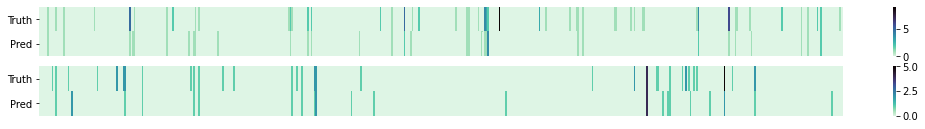

In [40]:
heatmap = results[['Fish', 'Fish_found']].to_numpy()
heatmap = np.transpose(heatmap)
fig,ax = plt.subplots(2,1,figsize=(18,2))
sns.heatmap(heatmap[:,:500], cmap ="mako_r", ax=ax[0], yticklabels=['Truth', 'Pred'], xticklabels=False)
sns.heatmap(heatmap[:,500:1000], cmap ="mako_r", ax=ax[1], yticklabels=['Truth', 'Pred'], xticklabels=False)
#sns.heatmap(heatmap[:,1000:], cmap ="mako_r", ax=ax[2], yticklabels=['Truth', 'Pred'], xticklabels=False)

plt.show()

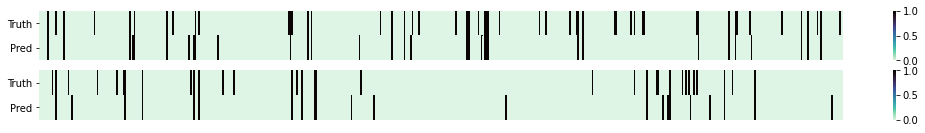

In [41]:
heatmap = results[['P_gt', 'P_preds']].to_numpy()
heatmap = np.transpose(heatmap)
fig,ax = plt.subplots(2,1,figsize=(18,2))
sns.heatmap(heatmap[:,:500], cmap ="mako_r", ax=ax[0], yticklabels=['Truth', 'Pred'], xticklabels=False)
sns.heatmap(heatmap[:,500:1000], cmap ="mako_r", ax=ax[1], yticklabels=['Truth', 'Pred'], xticklabels=False)
# sns.heatmap(heatmap[:,1000:], cmap ="mako_r", ax=ax[2], yticklabels=['Truth', 'Pred'], xticklabels=False)
plt.show()

In [ ]:
results.head()

# Optional: Run custom detector on image to investigate annotations

In [44]:
FP = results.query('Result == "FP"').Name.values
TP = results.query('Result == "TP"').Name.values
FN = results.query('Result == "FN"').Name.values
TN = results.query('Result == "TN"').Name.values

In [45]:
# need to set our custom cfg to test mode 
%cd /content/darknet/cfg
!sed -i 's/batch=64/batch=1/' yolov4-tiny.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov4-tiny.cfg
%cd /content/darknet

/content/darknet/cfg
/content/darknet


In [42]:
def predict(name, model, dataset, category):
  model_no = model.split('_')[1]
  weights = f'/mydrive/CLARE/YOLO_main/backup_{model_no}/yolov4-tiny_final.weights'
  input = f'/mydrive/CLARE/Data/{dataset}/{name}.JPG'
  output = f'/mydrive/CLARE/Results/{model}/{dataset}/{category}/{name}.JPG'
  !./darknet detector test data/obj.data cfg/yolov4-tiny.cfg $weights $input -Threshold -dont_show
  image = Image.open('predictions.jpg')
  image.save(output)

In [43]:
def copy_label(name, model, dataset, category):
  source = f'/mydrive/CLARE/Data/{dataset}/{name}.txt'
  dest = f'/mydrive/CLARE/Results/{model}/{dataset}/{category}/{name}.txt'
  !cp $source $dest


In [ ]:
for name in FP:
  predict(name, 'model_b', 'one_valid_b', 'FP')

for name in FN:
  predict(name, 'model_b', 'one_valid_b', 'FN')

for name in TP:
  predict(name, 'model_b', 'one_valid_b', 'TP')

for name in TN:
  predict(name, 'model_b', 'one_valid_b', 'TN')

In [27]:
16/416

0.038461538461538464

In [26]:
for name in FN:
  copy_label(name, 'model_b', 'one_valid_b', 'FN')

for name in TP:
  copy_label(name, 'model_b', 'one_valid_b', 'TP')

In [46]:
for name in FP:
  predict(name, 'model_d', 'one_valid_d', 'FP')

for name in FN:
  predict(name, 'model_d', 'one_valid_d', 'FN')

for name in TP:
  predict(name, 'model_d', 'one_valid_d', 'TP')

for name in FN:
  copy_label(name, 'model_d', 'one_valid_d', 'FN')

for name in TP:
  copy_label(name, 'model_d', 'one_valid_d', 'TP')

Streaming output truncated to the last 5000 lines.
  19 route  18 		                       1/2 ->   38 x  38 x 128 
  20 conv    128       3 x 3/ 1     38 x  38 x 128 ->   38 x  38 x 128 0.426 BF
  21 conv    128       3 x 3/ 1     38 x  38 x 128 ->   38 x  38 x 128 0.426 BF
  22 route  21 20 	                           ->   38 x  38 x 256 
  23 conv    256       1 x 1/ 1     38 x  38 x 256 ->   38 x  38 x 256 0.189 BF
  24 route  18 23 	                           ->   38 x  38 x 512 
  25 max                2x 2/ 2     38 x  38 x 512 ->   19 x  19 x 512 0.001 BF
  26 conv    512       3 x 3/ 1     19 x  19 x 512 ->   19 x  19 x 512 1.703 BF
  27 conv    256       1 x 1/ 1     19 x  19 x 512 ->   19 x  19 x 256 0.095 BF
  28 conv    512       3 x 3/ 1     19 x  19 x 256 ->   19 x  19 x 512 0.852 BF
  29 conv     18       1 x 1/ 1     19 x  19 x 512 ->   19 x  19 x  18 0.007 BF
  30 yolo
[yolo] params: iou loss: ciou (4), iou_norm: 0.07, obj_norm: 1.00, cls_norm: 1.00, delta_norm: 1.00,

In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

# Cheers!